In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [29]:
df = pd.read_csv(r'C:\Users\shail\OneDrive\Shailesh\Personal\Personal Learning\Udemy Projects\Campus Placement Predictor\Placement_Data_Full_Class.csv')
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [31]:
# Dropping the unwanted columns
df = df.drop(columns = ['sl_no'], axis = 1)
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [32]:
# Seperating the categorical and numerical variables
cat_vars = list(df.select_dtypes(include = ['object']).columns)
num_vars = list(df.select_dtypes(include = ['int32', 'int64', 'float32', 'float64']).columns)

print(f'Categorical Variable List ---> {cat_vars}')
print('-' * 120)
print(f'Numerical Variable List ---> {num_vars}')

Categorical Variable List ---> ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
------------------------------------------------------------------------------------------------------------------------
Numerical Variable List ---> ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


In [33]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

### Handling the Null Values

In [34]:
df.shape

(215, 14)

In [35]:
def plot_distplot(col):
    # Create a new figure with custom dimensions (15 inches wide by 7 inches tall)
    plt.figure(figsize=(15, 7))

    # Plot the distribution of the 'salary' column from the DataFrame
    # 'kde=True' enables the kernel density estimate (smoothed curve)
    # 'hist=False' disables the histogram bars
    # 'label' provides a legend entry, and 'color' sets the line color
    sns.distplot(df['salary'], kde=True, hist=False, label='Actual Salary', color='orange')

    # Overlay the distribution of the specified column (col) from the DataFrame
    sns.distplot(df[col], kde=True, hist=False, label=col, color='black')

    # Add legend in the best location automatically
    plt.legend(loc='best')

    # Display the plot
    plt.show()

In [36]:
df['salary'].mode()[0]

np.float64(300000.0)

In [37]:
# Fill missing values in the 'salary' column with the mean of the column
# Store the result in a new column called 'salary_mean'
df['salary_mean'] = df['salary'].fillna(df['salary'].mean())

# Fill missing values in the 'salary' column with the median of the column
# Store the result in a new column called 'salary_median'
df['salary_median'] = df['salary'].fillna(df['salary'].median())

# Fill missing values in the 'salary' column with the mode (most frequent value) of the column
# mode() returns a Series, so [0] is used to get the first mode value
# Store the result in a new column called 'salary_mode'
df['salary_mode'] = df['salary'].fillna(df['salary'].mode()[0])

# Display the updated DataFrame with the new columns
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_mean,salary_median,salary_mode
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,270000.000000,270000.0,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,200000.000000,200000.0,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,250000.000000,250000.0,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,288655.405405,265000.0,300000.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,425000.000000,425000.0,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0,400000.000000,400000.0,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0,275000.000000,275000.0,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0,295000.000000,295000.0,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0,204000.000000,204000.0,204000.0


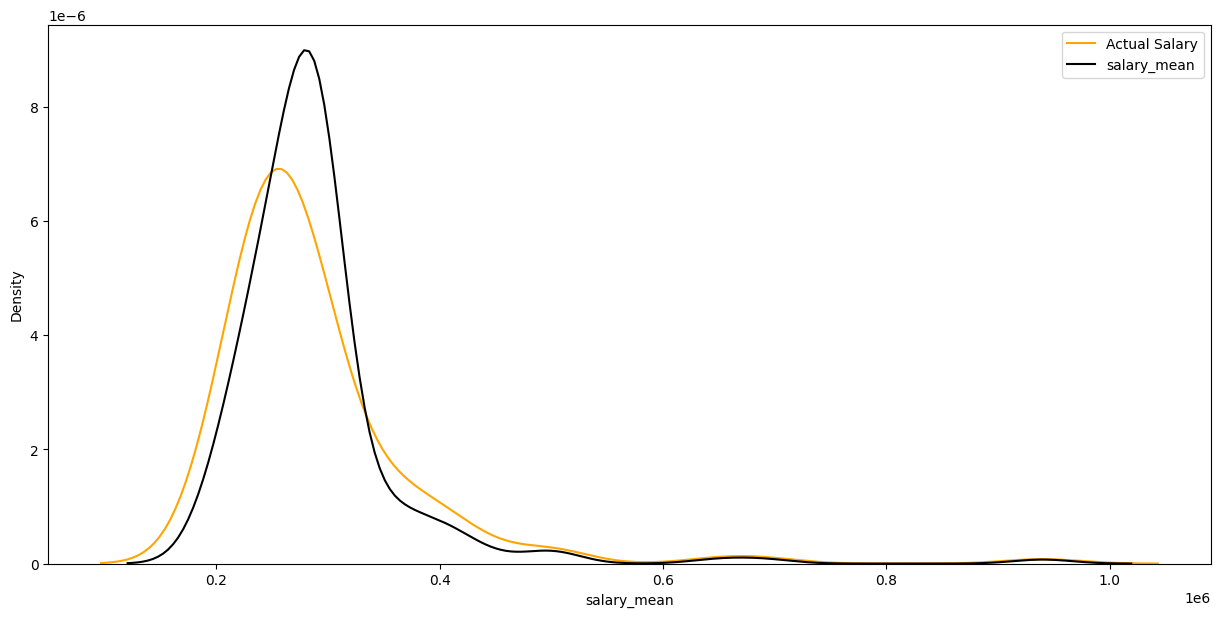

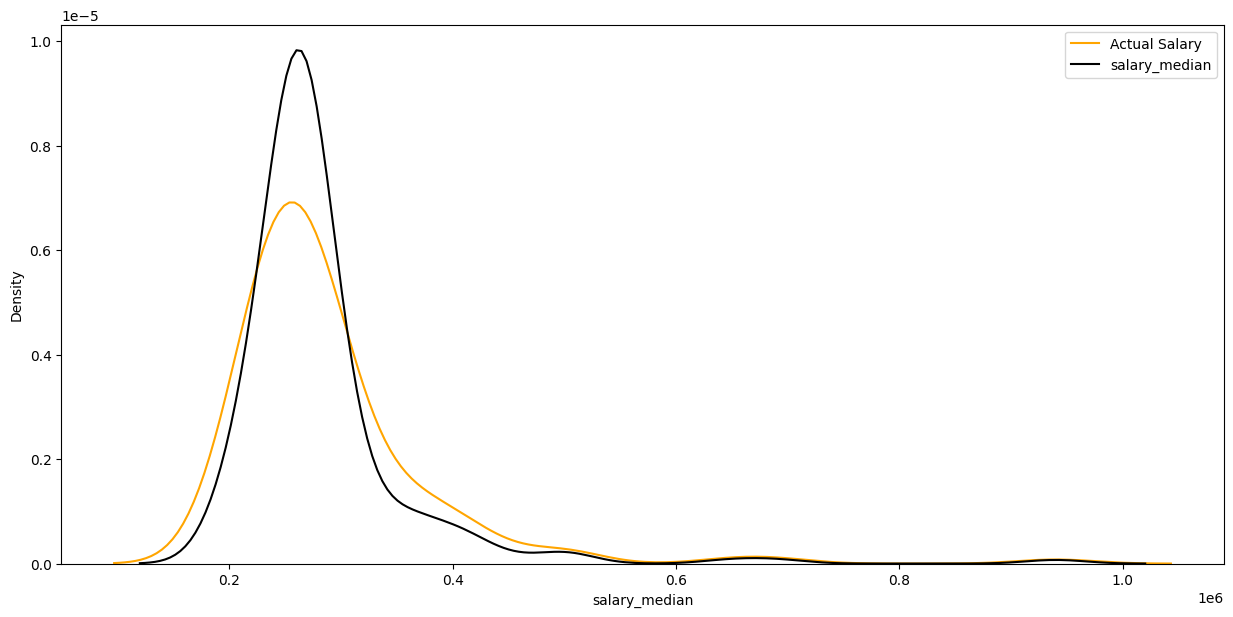

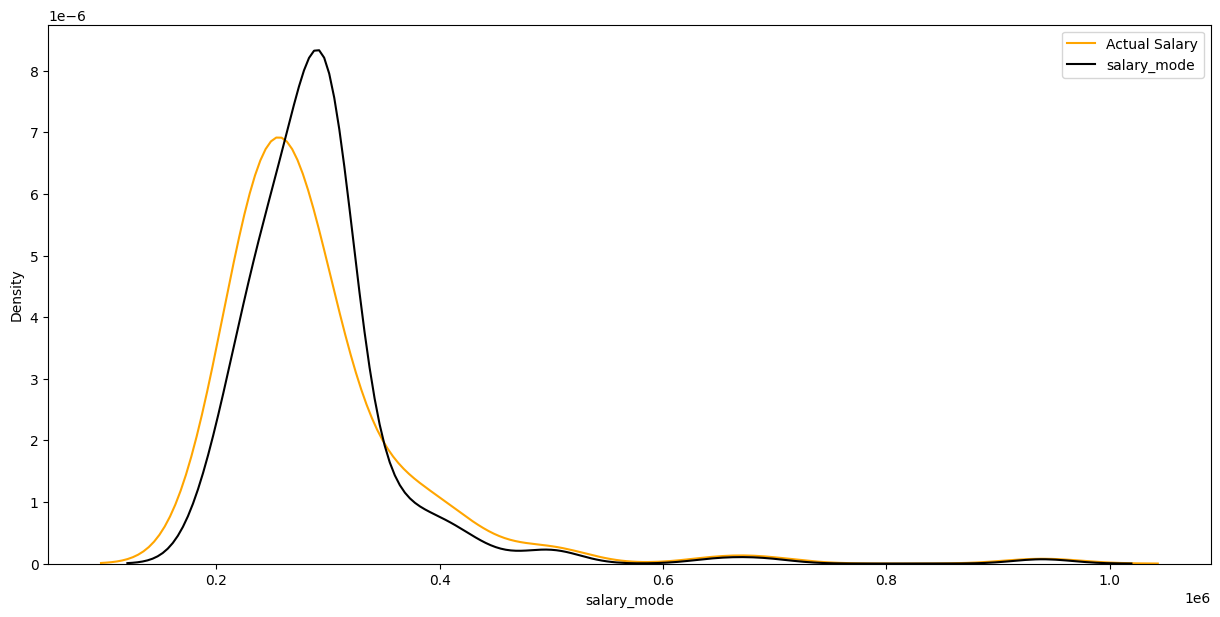

In [38]:
# Define a list of column names containing salary values imputed using different methods
sal_list = ['salary_mean', 'salary_median', 'salary_mode']

# Loop through each imputed salary column and plot its distribution
for sal in sal_list:
    # Call the custom function 'plot_distplot' to compare the distribution of the imputed salary
    # with the original 'salary' column
    plot_distplot(sal)

In [39]:
# Filling the missing values in the 'salary' column with the mean
df['salary'] = df['salary'].fillna(df['salary'].mean())
df = df.drop(columns = ['salary_mean', 'salary_median', 'salary_mode'], axis = 1)
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000


In [40]:
df.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

### EDA

In [41]:
def get_value_counts(col):
    """
    Returns the frequency of each unique value in the specified column
    as a dictionary with integer values.

    Parameters:
        col (str): Name of the column in the DataFrame

    Returns:
        dict: A dictionary where keys are unique values from the column
              and values are their respective counts
    """
    # Use value_counts() to get frequencies, convert to dict, and cast each count to int
    return {k: int(v) for k, v in dict(df[col].value_counts()).items()}


def get_count_plots(col):
    """
    Plots a count plot (bar chart) of categorical variable frequencies.

    Parameters:
        col (str): Name of the column to visualize

    This function creates a Seaborn countplot with:
    - Bold x and y axis tick labels
    - Uppercase x-axis label for emphasis
    - 'plasma' color palette for visual appeal
    """
    # Generate a count plot for the specified categorical column
    sns.countplot(x=df[col], palette='plasma')

    # Customize tick font size and weight for better readability
    plt.xticks(fontweight='bold', fontsize=10)
    plt.yticks(fontweight='bold', fontsize=10)

    # Set x-axis label in uppercase for visual emphasis
    plt.xlabel(col.upper())

    # Display the plot
    plt.show()

Count Plot for Feature 'GENDER' is shown below


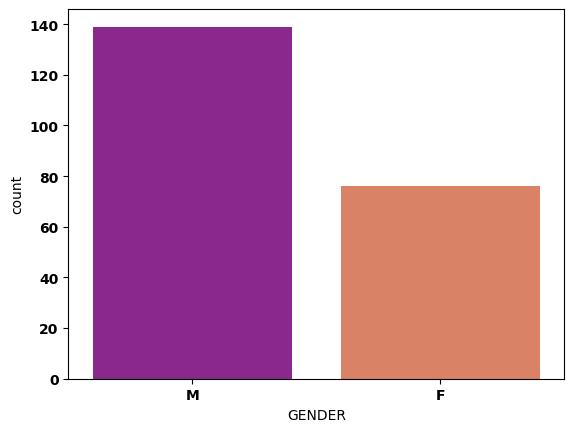

--------------------------------------------------------------------------------
Count Plot for Feature 'SSC_B' is shown below


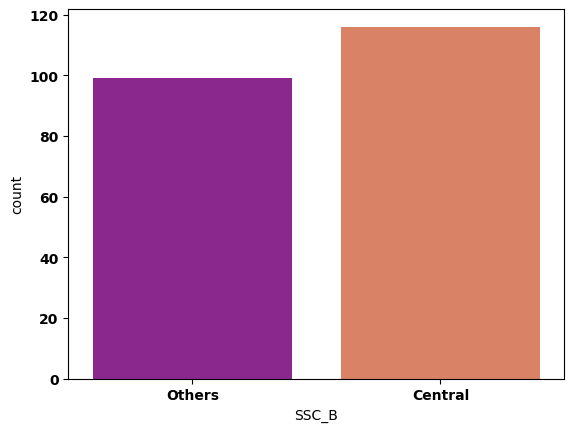

--------------------------------------------------------------------------------
Count Plot for Feature 'HSC_B' is shown below


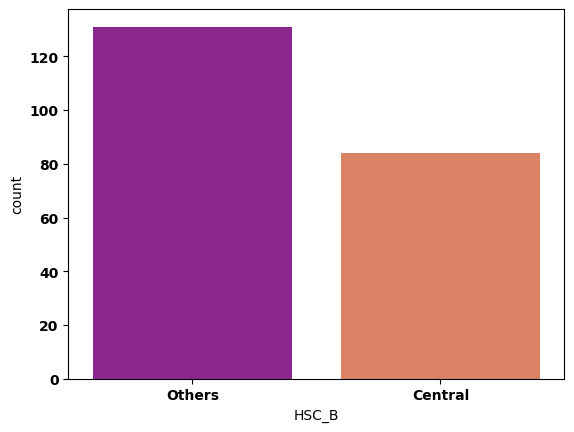

--------------------------------------------------------------------------------
Count Plot for Feature 'HSC_S' is shown below


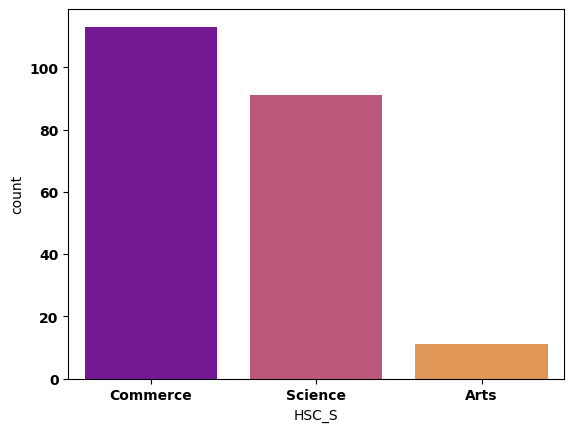

--------------------------------------------------------------------------------
Count Plot for Feature 'DEGREE_T' is shown below


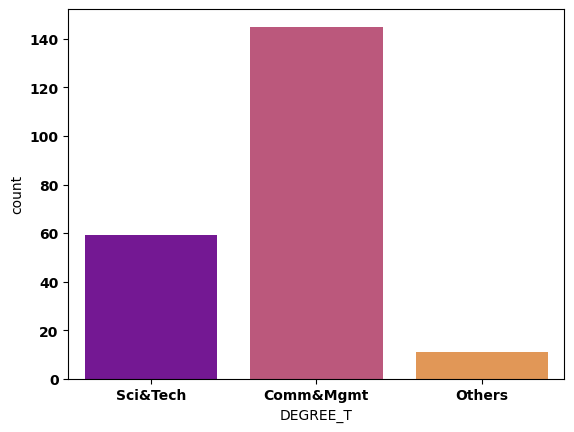

--------------------------------------------------------------------------------
Count Plot for Feature 'WORKEX' is shown below


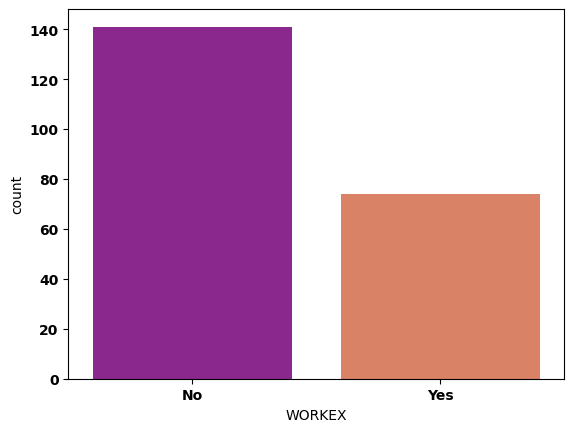

--------------------------------------------------------------------------------
Count Plot for Feature 'SPECIALISATION' is shown below


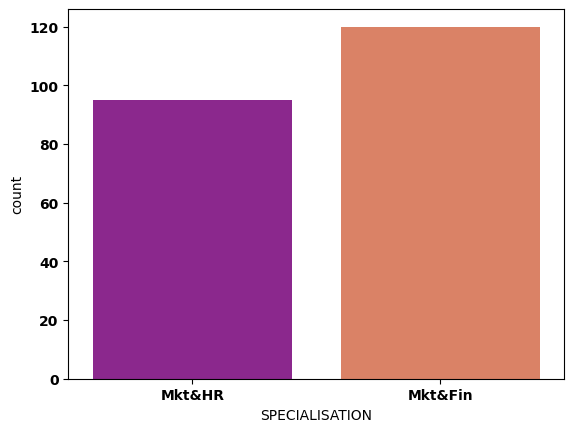

--------------------------------------------------------------------------------
Count Plot for Feature 'STATUS' is shown below


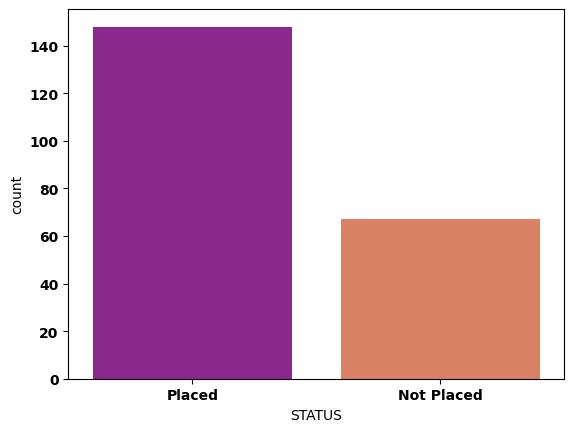

--------------------------------------------------------------------------------


In [42]:
# Loop through all categorical variables stored in the list 'cat_vars'
for col in cat_vars:
    # Print a message indicating which feature is being plotted
    print(f"Count Plot for Feature '{col.upper()}' is shown below")
    
    # Generate a count plot to visualize the frequency distribution of the current feature
    get_count_plots(col)
    
    # Print a visual separator for better readability between outputs
    print('-' * 80)

In [43]:
# Initialize an empty dictionary to store frequency counts of categorical variables
get_final_dict = {}

# Loop through each categorical variable in the list 'cat_vars'
for col in cat_vars:
    # Use the get_value_counts function to get a dictionary of value counts
    # and store it in get_final_dict with the column name as the key
    get_final_dict[col] = get_value_counts(col)

# Display the final dictionary containing value counts for all categorical features
get_final_dict

{'gender': {'M': 139, 'F': 76},
 'ssc_b': {'Central': 116, 'Others': 99},
 'hsc_b': {'Others': 131, 'Central': 84},
 'hsc_s': {'Commerce': 113, 'Science': 91, 'Arts': 11},
 'degree_t': {'Comm&Mgmt': 145, 'Sci&Tech': 59, 'Others': 11},
 'workex': {'No': 141, 'Yes': 74},
 'specialisation': {'Mkt&Fin': 120, 'Mkt&HR': 95},
 'status': {'Placed': 148, 'Not Placed': 67}}

In [44]:
# 🔍 Filter and rank top Science & Technology students who were placed

# Create a filtered DataFrame of students:
# - whose undergraduate degree type ('degree_t') is Science & Technology ('Sci&Tech')
# - and who have been placed ('status' == 'Placed')
placed_science_students = df[
    (df['degree_t'] == 'Sci&Tech') & (df['status'] == 'Placed')
]

# Sort the filtered students in descending order of salary
placed_science_students = placed_science_students.sort_values(
    by='salary', ascending=False
)

# Reset the index after sorting, dropping the old index column
placed_science_students = placed_science_students.reset_index(drop=True)

# Display the final DataFrame
placed_science_students


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
1,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.00,Mkt&Fin,66.23,Placed,500000.0
2,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.00,Mkt&Fin,66.46,Placed,500000.0
3,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.00,Mkt&Fin,57.65,Placed,500000.0
4,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.00,Mkt&HR,71.04,Placed,450000.0
5,M,81.00,Others,68.00,Others,Science,64.00,Sci&Tech,No,93.00,Mkt&Fin,62.56,Placed,411000.0
6,M,89.40,Others,65.66,Others,Science,71.25,Sci&Tech,No,72.00,Mkt&HR,63.23,Placed,400000.0
7,M,80.40,Central,73.40,Central,Science,77.72,Sci&Tech,Yes,81.20,Mkt&HR,76.26,Placed,400000.0
8,F,69.80,Others,60.80,Others,Science,72.23,Sci&Tech,No,55.53,Mkt&HR,68.81,Placed,360000.0
9,M,82.00,Others,61.00,Others,Science,62.00,Sci&Tech,No,89.00,Mkt&Fin,65.45,Placed,360000.0


In [45]:
# 🔍 Filter and rank top Commerce & Management students who were placed

# Create a filtered DataFrame of students:
# - whose undergraduate degree type ('degree_t') is Commerce & Management ('Comm&Mgmt')
# - and who have been placed ('status' == 'Placed')
placed_comm_students = df[
    (df['degree_t'] == 'Comm&Mgmt') & (df['status'] == 'Placed')
]

# Sort the filtered students in descending order of salary
placed_comm_students = placed_comm_students.sort_values(
    by='salary', ascending=False
)

# Reset the index after sorting for clean output
placed_comm_students = placed_comm_students.reset_index(drop=True)

# Display the final DataFrame
placed_comm_students

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,60.80,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
1,F,73.00,Central,97.00,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
2,M,85.80,Central,73.60,Central,Commerce,73.3,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
3,M,73.00,Central,78.00,Others,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.0
4,F,83.84,Others,89.83,Others,Commerce,77.2,Comm&Mgmt,Yes,78.74,Mkt&Fin,76.18,Placed,400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,F,65.00,Central,75.00,Central,Commerce,69.0,Comm&Mgmt,Yes,72.00,Mkt&Fin,64.66,Placed,200000.0
98,F,75.20,Central,73.20,Central,Science,68.4,Comm&Mgmt,No,65.00,Mkt&HR,62.98,Placed,200000.0
99,F,77.00,Others,73.00,Others,Commerce,81.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,69.70,Placed,200000.0
100,M,82.00,Others,90.00,Others,Commerce,83.0,Comm&Mgmt,No,80.00,Mkt&HR,73.52,Placed,200000.0


In [46]:
# 🔍 Identify students with the Maximum and Minimum Salaries

# Filter rows where the 'salary' column equals either:
# - the maximum salary in the dataset
# - or the minimum salary in the dataset
max_min_salary = df[
    (df['salary'] == max(df['salary'])) | (df['salary'] == min(df['salary']))
]

# Sort the resulting DataFrame in descending order of salary
max_min_salary = max_min_salary.sort_values(by='salary', ascending=False)

# Reset the index for clean output and remove the old index
max_min_salary = max_min_salary.reset_index(drop=True)

# Display students with the highest and lowest salaries
max_min_salary

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,60.80,Central,68.40,Central,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
1,F,65.00,Central,75.00,Central,Commerce,69.00,Comm&Mgmt,Yes,72.00,Mkt&Fin,64.66,Placed,200000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
3,F,77.00,Others,73.00,Others,Commerce,81.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,69.70,Placed,200000.0
4,F,75.20,Central,73.20,Central,Science,68.40,Comm&Mgmt,No,65.00,Mkt&HR,62.98,Placed,200000.0
5,M,82.00,Others,90.00,Others,Commerce,83.00,Comm&Mgmt,No,80.00,Mkt&HR,73.52,Placed,200000.0
6,F,72.00,Central,56.00,Others,Science,69.00,Comm&Mgmt,No,55.60,Mkt&HR,65.63,Placed,200000.0


In [47]:
# 🔍 Filter Science & Technology students earning above the average salary

# Create a filtered DataFrame of students who meet both criteria:
# 1. Their degree type ('degree_t') is Science & Technology ('Sci&Tech')
# 2. Their salary is greater than the overall average salary in the dataset
science_salary_df = df[
    (df['degree_t'] == 'Sci&Tech') & (df['salary'] > df['salary'].mean())
]

# Sort these students in descending order of salary
science_salary_df = science_salary_df.sort_values(by='salary', ascending=False)

# Reset index for clean presentation and drop the old index
science_salary_df = science_salary_df.reset_index(drop=True)

# Display the filtered and sorted DataFrame
science_salary_df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
1,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.00,Mkt&Fin,57.65,Placed,500000.0
2,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.00,Mkt&Fin,66.46,Placed,500000.0
3,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.00,Mkt&Fin,66.23,Placed,500000.0
4,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.00,Mkt&HR,71.04,Placed,450000.0
5,M,81.00,Others,68.00,Others,Science,64.00,Sci&Tech,No,93.00,Mkt&Fin,62.56,Placed,411000.0
6,M,80.40,Central,73.40,Central,Science,77.72,Sci&Tech,Yes,81.20,Mkt&HR,76.26,Placed,400000.0
7,M,89.40,Others,65.66,Others,Science,71.25,Sci&Tech,No,72.00,Mkt&HR,63.23,Placed,400000.0
8,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000.0
9,F,69.80,Others,60.80,Others,Science,72.23,Sci&Tech,No,55.53,Mkt&HR,68.81,Placed,360000.0


In [48]:
# 🔍 Filter Commerce & Management students earning above the average salary

# Create a filtered DataFrame of students who satisfy both conditions:
# 1. Their undergraduate degree type is Commerce & Management ('Comm&Mgmt')
# 2. Their salary is greater than the overall average salary in the dataset
commerce_salary_df = df[
    (df['degree_t'] == 'Comm&Mgmt') & (df['salary'] > df['salary'].mean())
]

# Sort these students by salary in descending order
commerce_salary_df = commerce_salary_df.sort_values(by='salary', ascending=False)

# Reset index for clean tabular output
commerce_salary_df = commerce_salary_df.reset_index(drop=True)

# Display the filtered DataFrame
commerce_salary_df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,60.80,Central,68.40,Central,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
1,F,73.00,Central,97.00,Others,Commerce,79.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
2,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
3,M,73.00,Central,78.00,Others,Commerce,65.00,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.0
4,F,83.84,Others,89.83,Others,Commerce,77.20,Comm&Mgmt,Yes,78.74,Mkt&Fin,76.18,Placed,400000.0
5,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,400000.0
6,F,79.00,Others,76.00,Others,Commerce,85.00,Comm&Mgmt,No,95.00,Mkt&Fin,69.06,Placed,393000.0
7,M,63.00,Central,72.00,Central,Commerce,68.00,Comm&Mgmt,No,78.00,Mkt&HR,60.44,Placed,380000.0
8,M,69.00,Central,63.00,Others,Science,65.00,Comm&Mgmt,Yes,55.00,Mkt&HR,58.23,Placed,360000.0
9,M,68.00,Central,76.00,Central,Commerce,74.00,Comm&Mgmt,No,80.00,Mkt&Fin,63.59,Placed,360000.0


<Axes: xlabel='degree_t'>

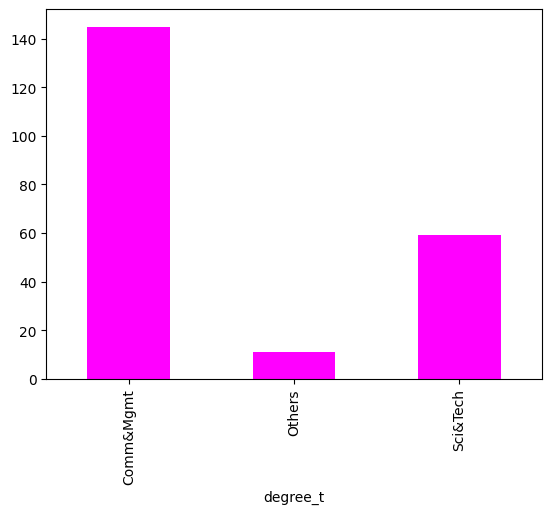

In [49]:
# 📊 Plot the total number of students (placed + not placed) in each degree category

# Group the dataset by 'degree_t' (degree type)
# Count how many students belong to each degree type using the 'status' column
# Then plot the counts as a bar chart using magenta color
df.groupby('degree_t')['status'].count().plot(kind='bar', color='magenta')

<Axes: xlabel='specialisation'>

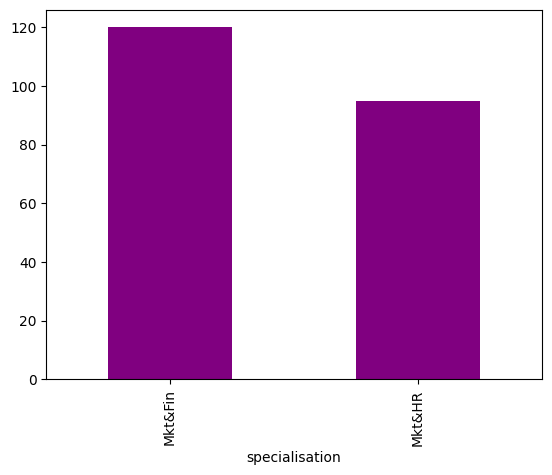

In [50]:
# 📊 Plot the total number of students (placed + not placed) by MBA specialisation

# Group the dataset by 'specialisation' (e.g., Marketing, HR)
# Count the number of students in each specialisation using the 'status' column
# Plot the result as a bar chart with purple bars
df.groupby('specialisation')['status'].count().plot(kind='bar', color='purple')

<Axes: ylabel='status'>

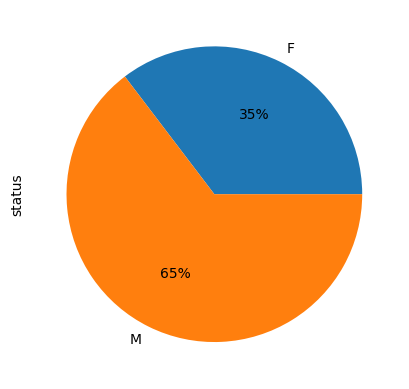

In [51]:
# 📊 Visualize the percentage of students placed based on gender

# Group the dataset by 'gender'
# Count the number of placed students for each gender using the 'status' column
# Plot the result as a pie chart with percentage labels (no decimal places)
df.groupby('gender')['status'].count().plot(kind='pie', autopct='%1.0f%%')

In [52]:
# Checking out the Maximmum Female Salary
female_df = df[df['gender'] == 'F']
max_female_sal = female_df[female_df['salary'] == max(female_df['salary'])].style.background_gradient(cmap = 'plasma')
max_female_sal

AttributeError: The '.style' accessor requires jinja2

<Axes: ylabel='status'>

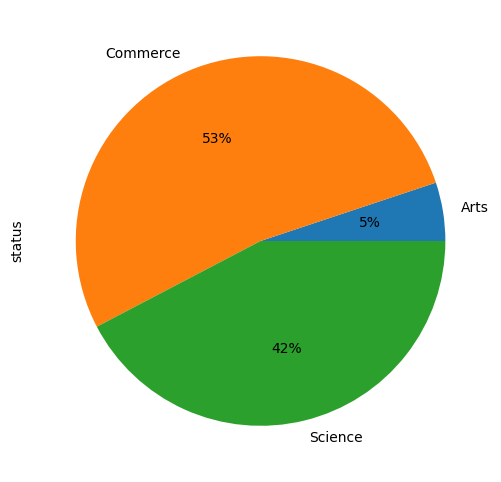

In [53]:
# 📊 Visualize the distribution of students based on HSC (Higher Secondary) stream
# and their placement participation (total count, not success rate)

# Group the data by 'hsc_s' (Higher Secondary stream: e.g., Science, Commerce, Arts)
# Count the number of students in each stream using the 'status' column
# Plot the result as a pie chart with percentage labels (rounded to whole numbers)
# Set the figure size to 12x6 inches for better visibility
df.groupby('hsc_s')['status'].count().plot(kind='pie', autopct='%1.0f%%', figsize=(12, 6))

### Processing the Categorical Features

In [54]:
get_final_dict

{'gender': {'M': 139, 'F': 76},
 'ssc_b': {'Central': 116, 'Others': 99},
 'hsc_b': {'Others': 131, 'Central': 84},
 'hsc_s': {'Commerce': 113, 'Science': 91, 'Arts': 11},
 'degree_t': {'Comm&Mgmt': 145, 'Sci&Tech': 59, 'Others': 11},
 'workex': {'No': 141, 'Yes': 74},
 'specialisation': {'Mkt&Fin': 120, 'Mkt&HR': 95},
 'status': {'Placed': 148, 'Not Placed': 67}}

In [55]:
len(get_final_dict['status']), len(get_final_dict['degree_t'])

(2, 3)

In [56]:
# ✅ Categorize categorical features based on the number of unique values (levels)

# Identify binary (boolean-like) categorical columns
# These are the columns where the number of unique values is exactly 2
bool_cols = [key for key, value in get_final_dict.items() if len(get_final_dict[key]) == 2]

# Identify categorical columns with more than 2 unique values (e.g., triple levels or more)
# These are considered for different encoding or deeper analysis
trip_cols = [key for key in list(get_final_dict.keys()) if key not in bool_cols]

# Display the results
print(f'Bool Column List ----> {bool_cols}')        # Columns with 2 categories
print('-' * 100)                                     # Separator line
print(f'Triple Column List ----> {trip_cols}')       # Columns with more than 2 categories

Bool Column List ----> ['gender', 'ssc_b', 'hsc_b', 'workex', 'specialisation', 'status']
----------------------------------------------------------------------------------------------------
Triple Column List ----> ['hsc_s', 'degree_t']


In [57]:
# 🔤 Apply Label Encoding to all categorical variables and store class mappings

# Define a function that applies Label Encoding to a specified column using a LabelEncoder instance
def labelencode(le, col):
    # Transform the categorical column into numerical labels and overwrite the original column
    df[col] = le.fit_transform(df[col])

# Initialize an empty dictionary to store label-to-code mappings for each column
get_mappings = {}

# Import LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder

# Create a single instance of LabelEncoder to reuse for all columns
le = LabelEncoder()

# Loop through each categorical column from get_final_dict
for col in list(get_final_dict.keys()):
    # Apply label encoding on the column
    labelencode(le, col)
    
    # Save the mapping of original category labels to numeric codes
    get_mappings[col] = {cls: int(code) for cls, code in zip(le.classes_, le.transform(le.classes_))}

# Display the first few rows of the encoded DataFrame
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.000000
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.000000
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.000000
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,288655.405405
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.000000


In [58]:
# The mapping structure followed by the Label Encoder is shown below
get_mappings

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

### Processing the Numerical Features

In [59]:
# 📊 Visualize the distribution, normality, and outliers of a numerical feature

import scipy.stats as stats

def get_plots(df, col):
    # Create a figure with a specific size (15 inches wide, 7 inches tall)
    plt.figure(figsize=(15, 7))
    
    # Subplot 1: Histogram to visualize frequency distribution
    plt.subplot(1, 3, 1)
    plt.hist(df[col], color='magenta')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Subplot 2: Q-Q Plot (Quantile-Quantile Plot) to assess normality
    plt.subplot(1, 3, 2)
    stats.probplot(df[col], dist='norm', plot=plt)
    plt.title(f'Q-Q Plot of {col}')

    # Subplot 3: Boxplot to detect outliers and view data spread
    plt.subplot(1, 3, 3)
    sns.boxplot(x=df[col], color='magenta')
    plt.title(f'Boxplot of {col}')

    # Ensure subplots do not overlap and adjust layout
    plt.tight_layout()
    
    # Display all three plots
    plt.show()

In [60]:
num_vars

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

Distribution Plots for 'SSC_P' are shown below :


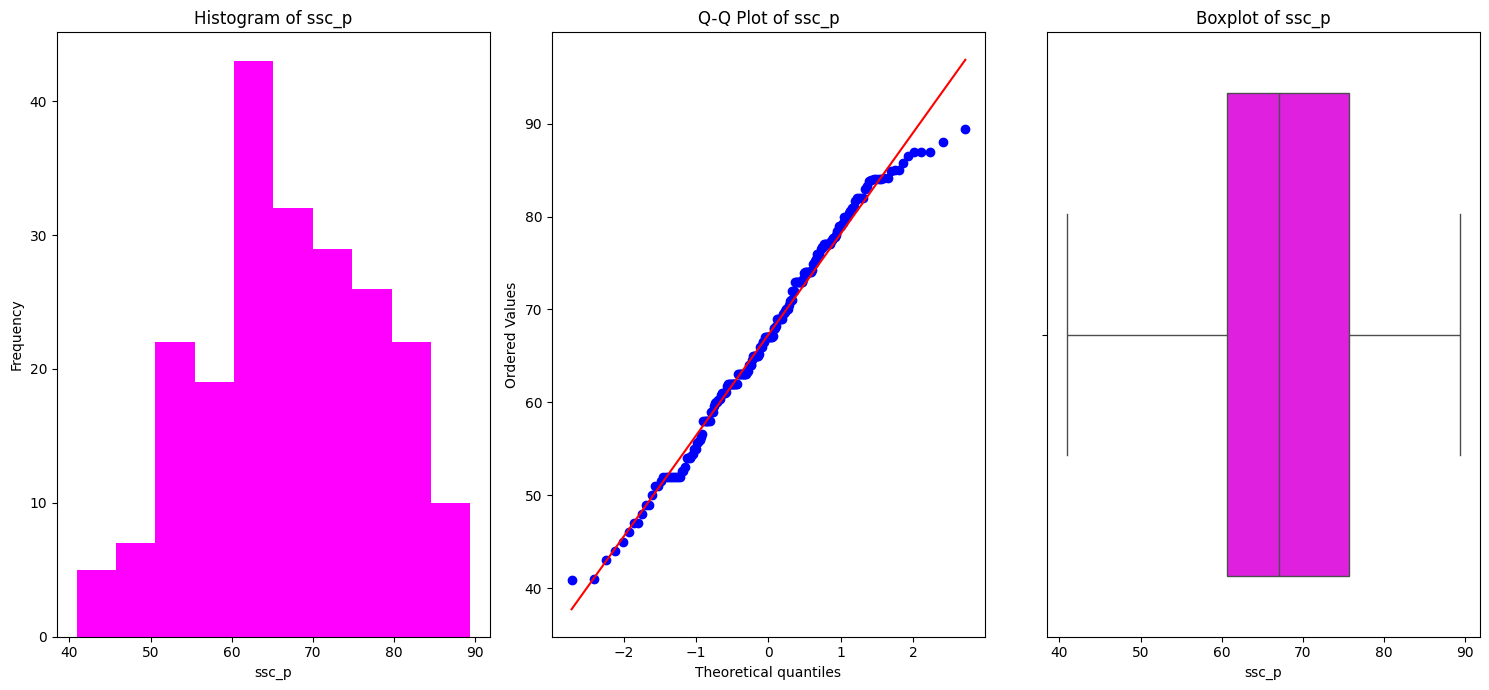

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Distribution Plots for 'HSC_P' are shown below :


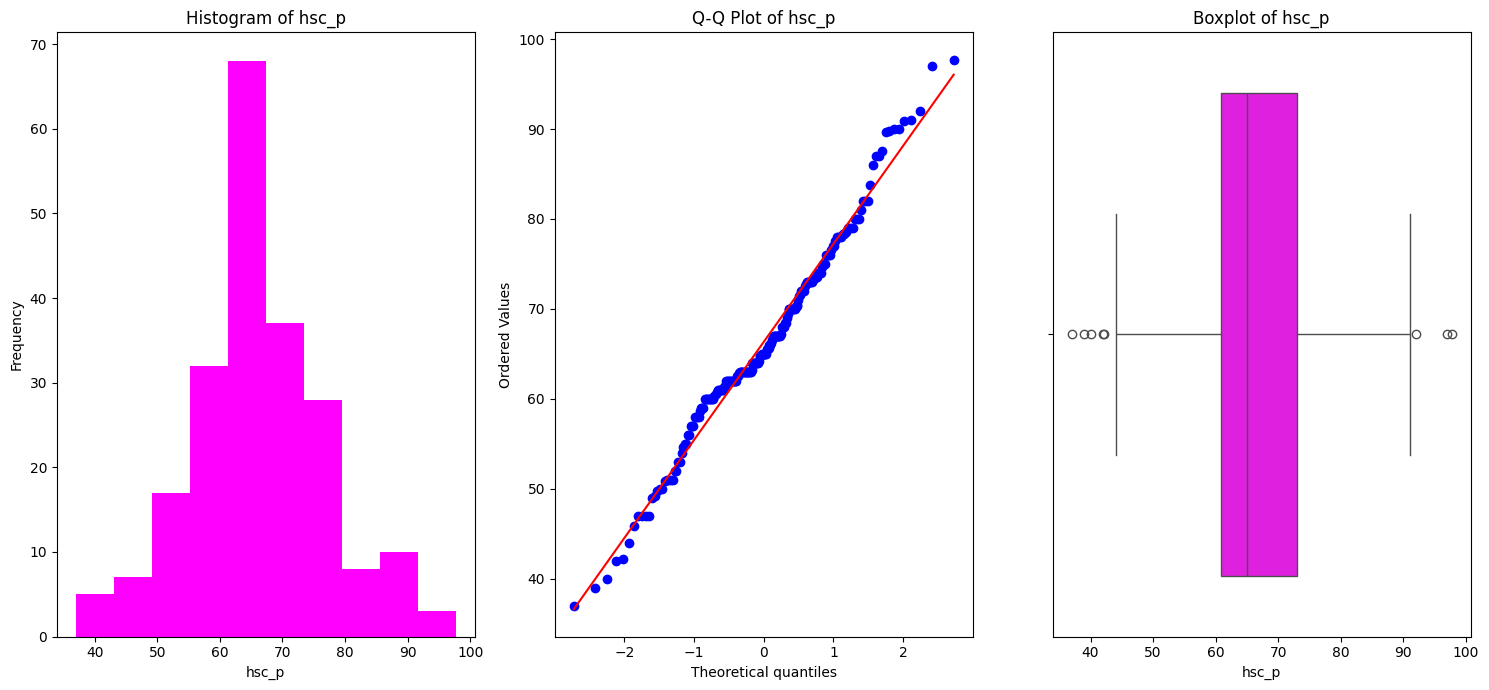

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Distribution Plots for 'DEGREE_P' are shown below :


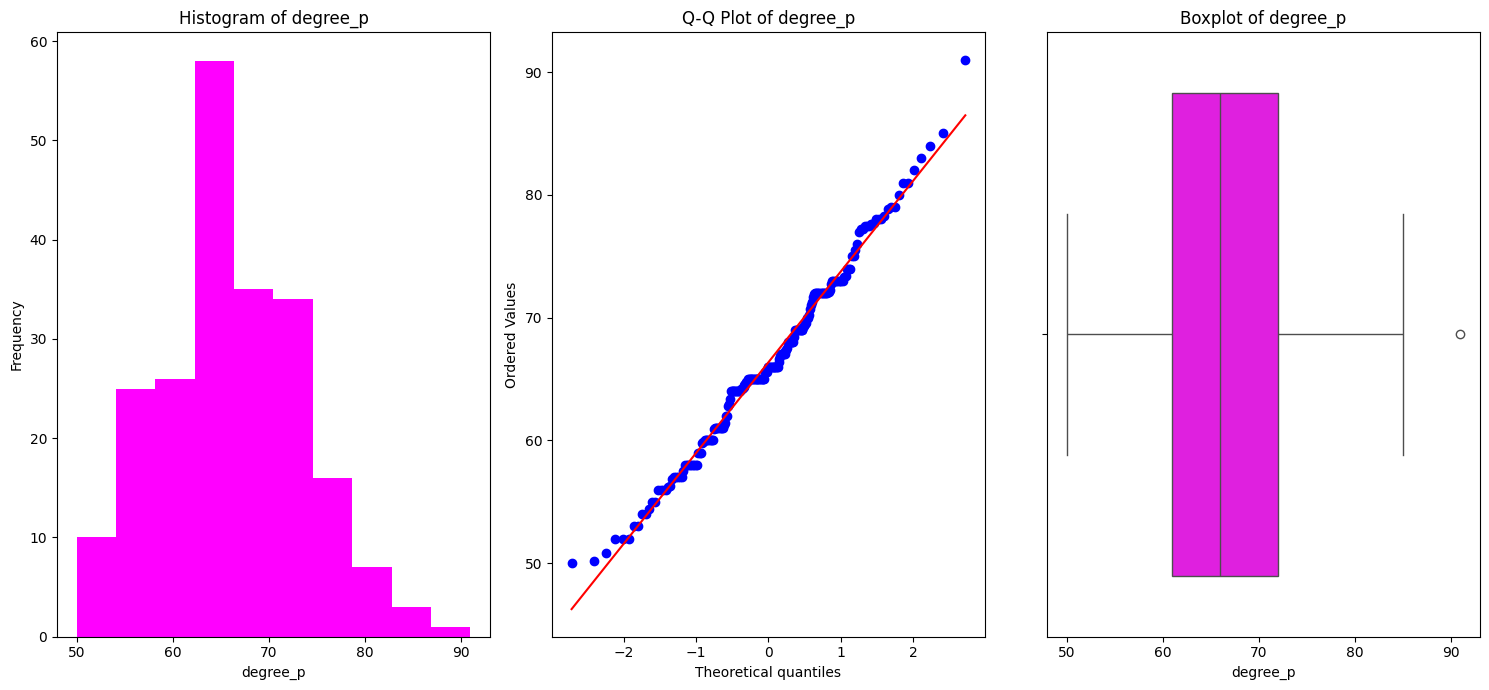

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Distribution Plots for 'ETEST_P' are shown below :


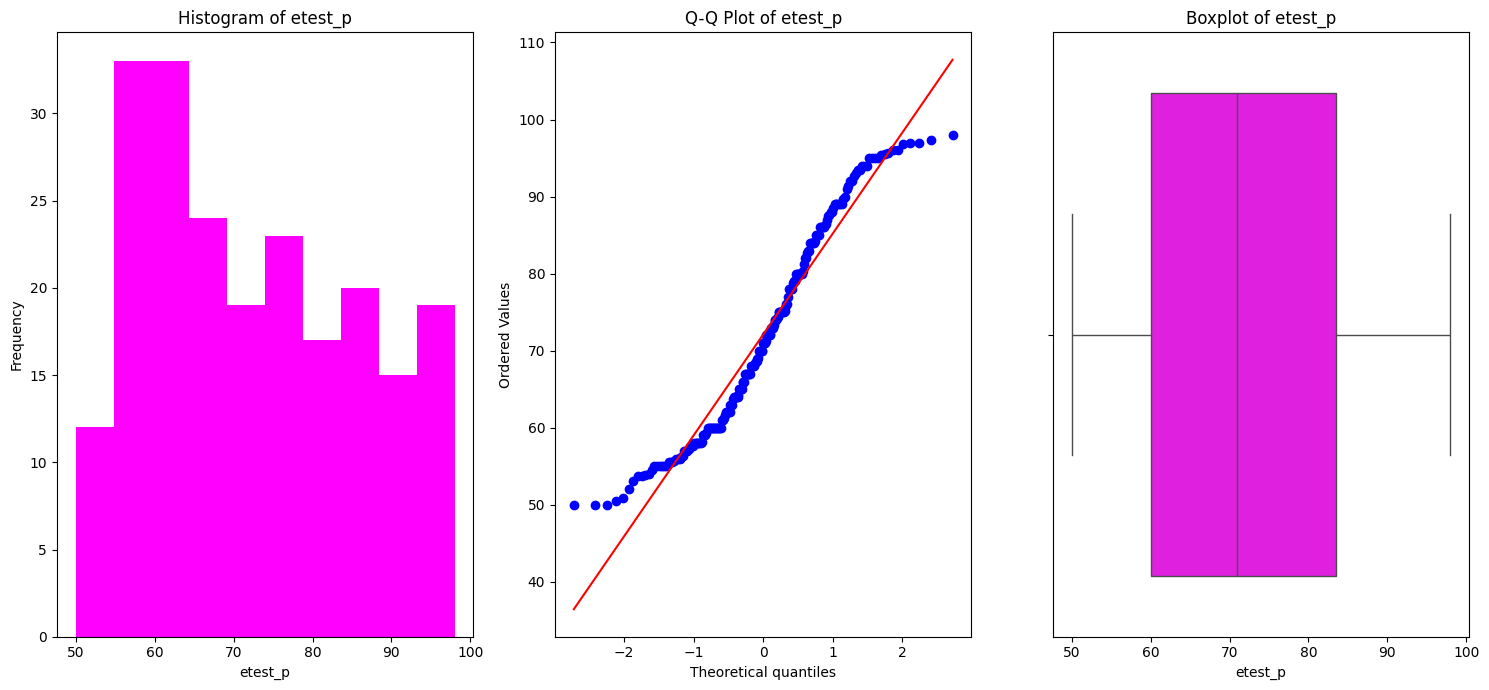

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Distribution Plots for 'MBA_P' are shown below :


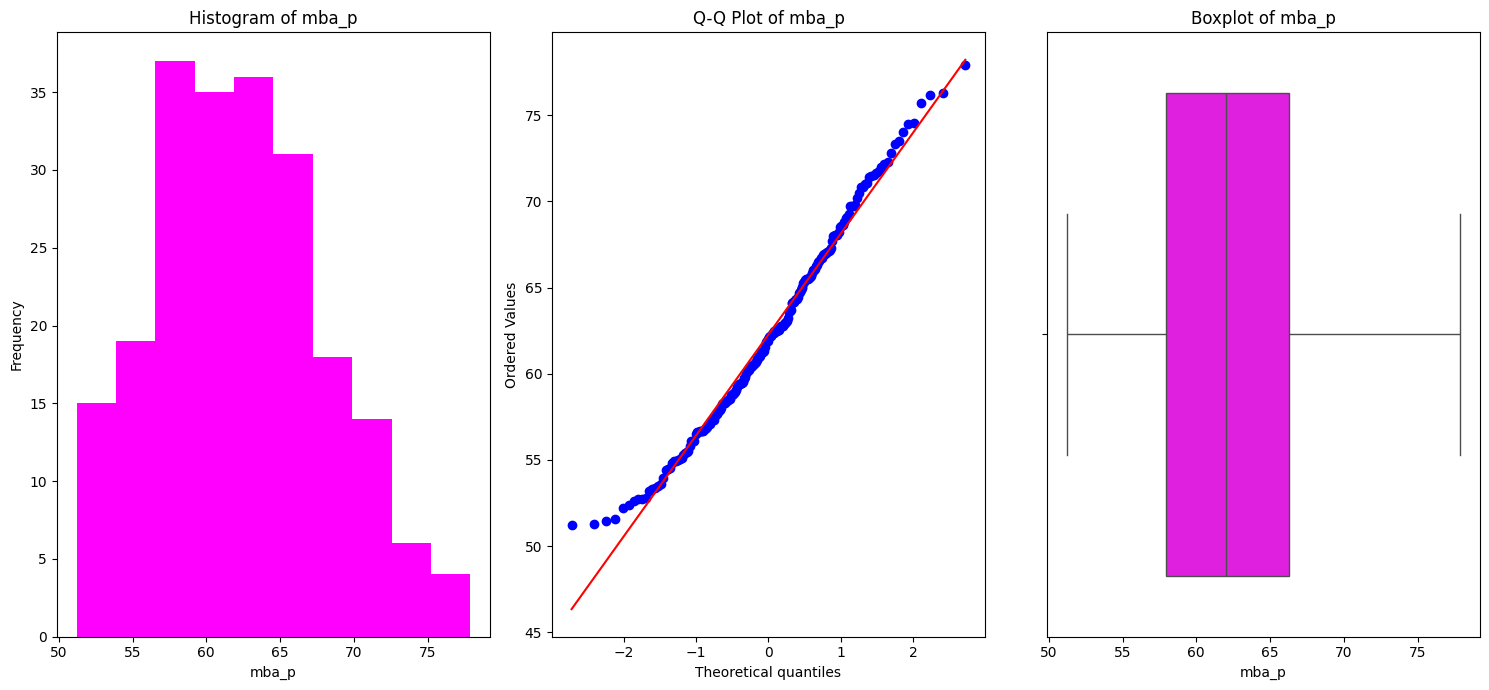

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Distribution Plots for 'SALARY' are shown below :


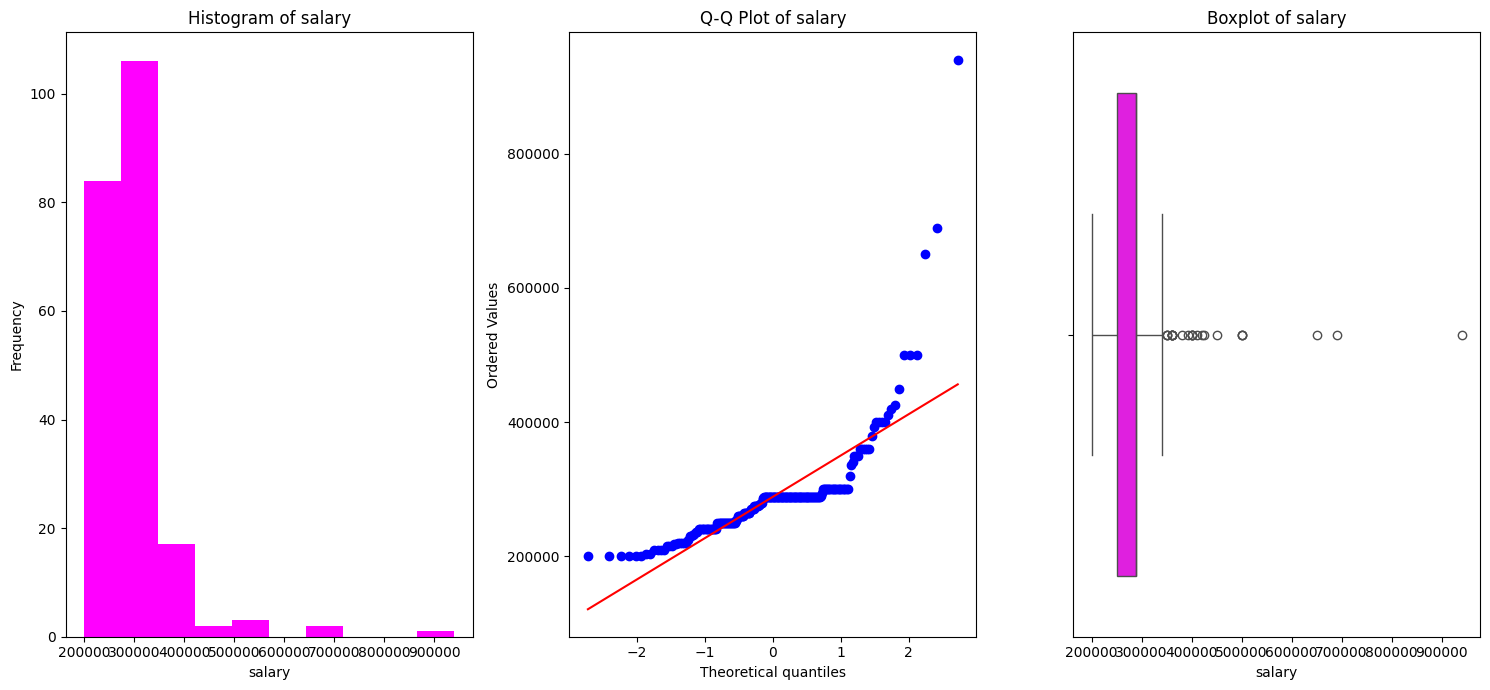

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [61]:
# 🔁 Loop through all numerical variables and visualize their distribution and spread

for col in num_vars:
    # Print a clear title for the current column being analyzed
    print(f"Distribution Plots for '{col.upper()}' are shown below :")
    
    # Call the get_plots() function to show:
    # - Histogram
    # - Q-Q plot (normality check)
    # - Boxplot (outlier detection)
    get_plots(df, col)
    
    # Print a visual separator to distinguish between each set of plots
    print('-' * 160)

### Feature Selection

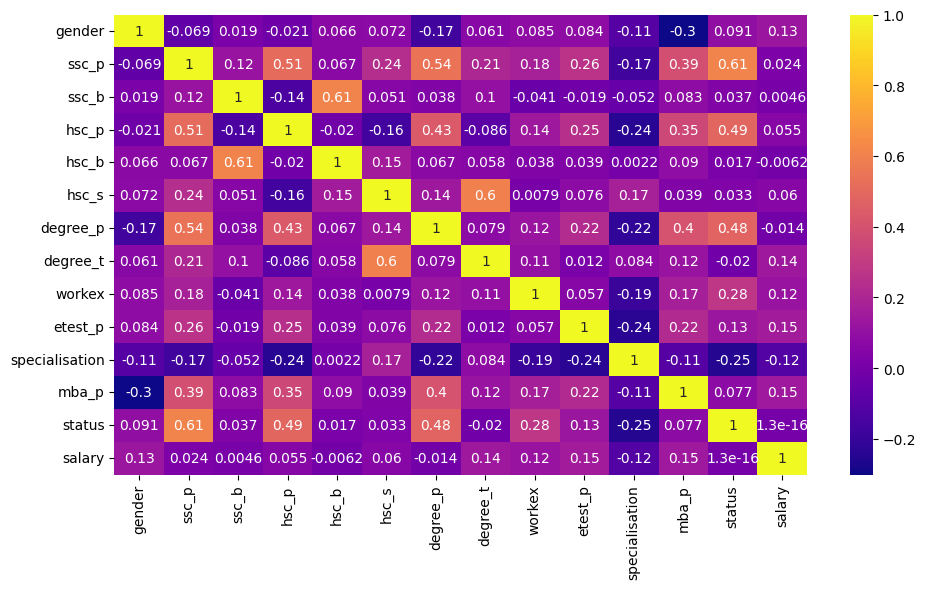

In [62]:
# Checking for tightly co-related variables
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True, cmap = 'plasma')
plt.tight_layout()
plt.show()

In [63]:
# Now we go ahead and drop the 'salary' feature as well because that only comes into play once the student gets placed and not before that
data = df.copy()
test = data['status']
train = data.drop(columns = ['salary', 'status'], axis = 1)

In [64]:
# Building the Extra Trees Classifier for selecting the important features
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(train, test)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


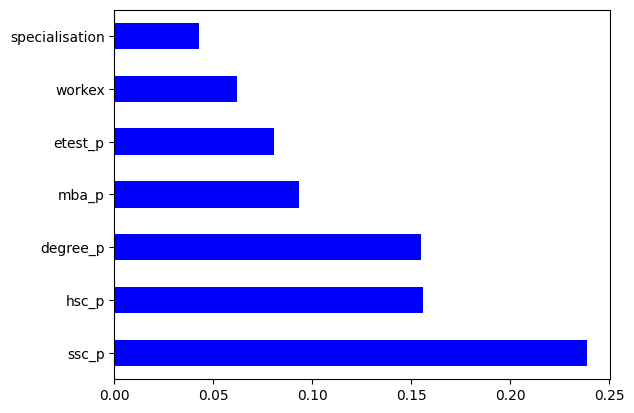

In [65]:
# 📊 Visualize the top 7 most important features from the Extra Trees Classifier model

# Create a pandas Series with feature importance scores from the trained Extra Trees Classifier (etc)
# Use the column names from the training dataset as index
feat_bar = pd.Series(etc.feature_importances_, index=train.columns)

# Plot the top 7 features based on their importance scores using a horizontal bar chart
feat_bar.nlargest(7).plot(kind='barh', color='blue')

# Display the plot
plt.show()

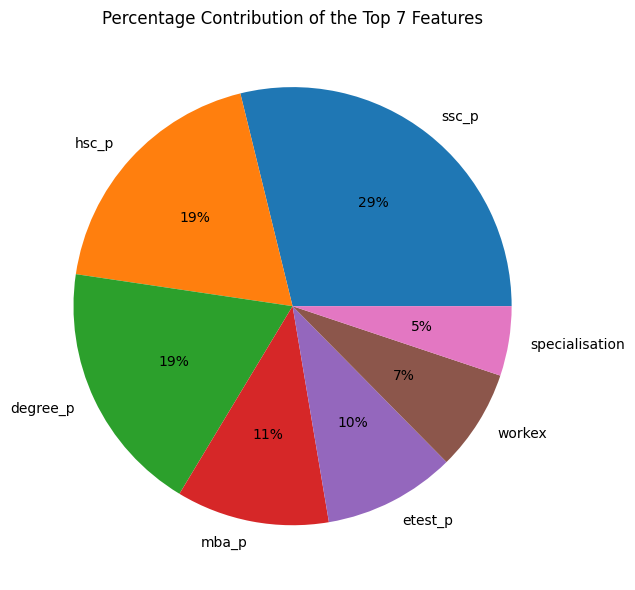

In [66]:
# 🥧 Visualize percentage contribution of the top 7 features in the model

# Plot a pie chart showing the top 7 features based on their importance scores
# 'autopct' formats the percentage values on the chart (no decimal places)
# 'figsize' sets the width and height of the plot
feat_bar.nlargest(7).plot(kind='pie', autopct='%1.0f%%', figsize=(10, 6))

# Add a centered title for the pie chart
plt.title('Percentage Contribution of the Top 7 Features', loc='center')

# Adjust layout to avoid label overlapping
plt.tight_layout()

# Display the pie chart
plt.show()

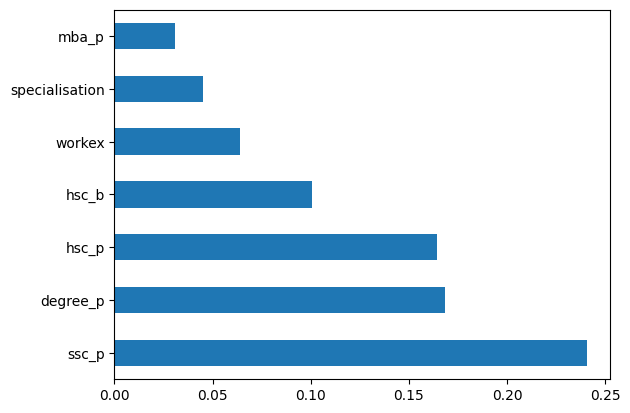

In [67]:
# 📊 Determine important features using Mutual Information for classification

# Import mutual_info_classif for feature selection based on mutual information
from sklearn.feature_selection import mutual_info_classif

# Compute the mutual information between each feature in the training set and the target variable
# This measures the dependency between each input feature and the output label
mic = mutual_info_classif(train, test)

# Convert the result into a pandas Series for easy manipulation and plotting
# Use feature names from the training data as the index
ax = pd.Series(mic, index=train.columns)

# Plot the top 7 features with the highest mutual information scores using a horizontal bar chart
ax.nlargest(7).plot(kind='barh')

# Display the plot
plt.show()

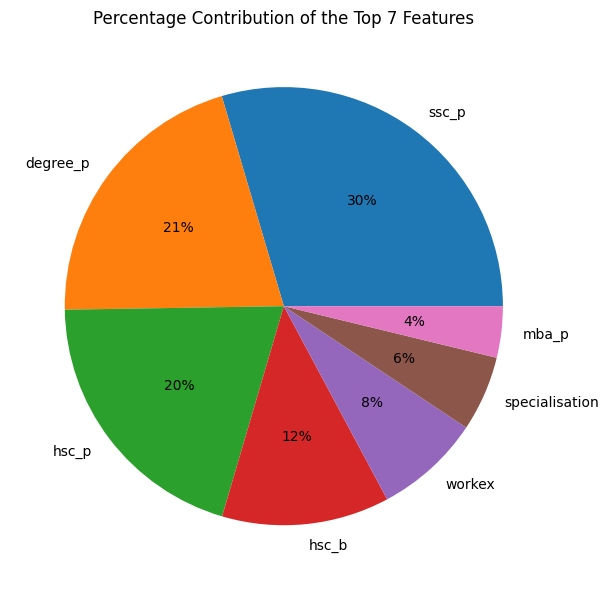

In [68]:
# 🥧 Visualize the percentage contribution of the top 7 features based on Mutual Information

# Plot a pie chart of the top 7 features with highest mutual information scores
# 'autopct' shows the percentage values rounded to whole numbers
# 'figsize' defines the width and height of the chart
ax.nlargest(7).plot(kind='pie', autopct='%1.0f%%', figsize=(10, 6))

# Add a descriptive and centered title to the pie chart
plt.title('Percentage Contribution of the Top 7 Features', loc='center')

# Adjust layout to prevent overlapping of labels and ensure a clean visual
plt.tight_layout()

# Display the pie chart
plt.show()

In [69]:
'''
🎯 Feature Selection Strategy:
We now select the top 10 features from both methods:
- Extra Trees Classifier (feat_bar)
- Mutual Information Classifier (ax)

Then, we take the intersection of both lists to identify the most consistently important features.
This helps in confidently selecting the top contributors by combining model-based and statistical criteria.
'''

# Get the top 10 features based on Extra Trees Classifier importance scores
etc_cols = list(feat_bar.nlargest(10).index)

# Get the top 10 features based on Mutual Information scores
mic_cols = list(ax.nlargest(10).index)

# Find the common features in both top-10 lists
common_cols = list(set(etc_cols).intersection(set(mic_cols)))

# Print the final list of commonly ranked top features
print(common_cols)

['hsc_p', 'mba_p', 'hsc_s', 'gender', 'degree_p', 'ssc_p', 'workex', 'specialisation']


In [70]:
# So now we select only the common and important features based on the process carried out above
train = df[common_cols]
train

,hsc_p,mba_p,hsc_s,gender,degree_p,ssc_p,workex,specialisation
0,91.00,58.80,1,1,58.00,67.00,0,1
1,78.33,66.28,2,1,77.48,79.33,1,0
2,68.00,57.80,0,1,64.00,65.00,0,0
3,52.00,59.43,2,1,52.00,56.00,0,1
4,73.60,55.50,1,1,73.30,85.80,0,0
...,...,...,...,...,...,...,...,...
210,82.00,74.49,1,1,77.60,80.60,0,0
211,60.00,53.62,2,1,72.00,58.00,0,0
212,67.00,69.72,1,1,73.00,67.00,1,0
213,66.00,60.23,1,0,58.00,74.00,0,1


### 📌 Interpretation of Selected Features

Upon analyzing the top contributing features identified through both **Extra Trees Classifier** and **Mutual Information**, we observe that the following **categorical variables** consistently appear as important:
- `gender`
- `specialisation`
- `degree_t`
- `workex`

These features intuitively align with real-world placement processes:

- **Academic Performance** (`mba_p`, `ssc_p`, `hsc_p`, `degree_p`) is a primary filtering criterion during most campus recruitment drives.
- **Work Experience** (`workex`) adds significant value to a candidate’s profile and often sets them apart in pre-placement screening.
- **Specialisation** (`specialisation`) influences eligibility for specific roles (e.g., Marketing vs. HR).
- **Degree Type** (`degree_t`) helps determine domain readiness (e.g., Sci&Tech vs. Comm&Mgmt).
- **Gender** (`gender`) may play a role in hiring decisions, especially with companies that actively promote **diversity and women empowerment initiatives**.

👉 **Conclusion**:  

The selected features not only show statistical relevance but also make **practical sense** in the context of campus placements — making them reliable inputs for the prediction model.

In [71]:
get_mappings

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

In [72]:
# 🛠️ Renaming and rearranging training feature columns for clarity and presentation

# Select a subset of important columns from the training DataFrame
train = train[['gender', 'specialisation', 'workex', 'ssc_p', 'hsc_p', 'degree_p', 'mba_p']]

# Rename the selected columns to more readable and presentation-friendly labels
train.columns = ['Gender', 'Specialisation', 'Work Experience', 'SSC %', 'High School %', 'Degree %', 'MBA %']

# Add a new column 'Technical Degree' by copying values from the original DataFrame's 'degree_t' column
train['Technical Degree'] = df['degree_t'].values

# Reorder the columns to include 'Technical Degree' in the appropriate position
train = train[['Gender', 'Specialisation', 'Technical Degree', 'Work Experience', 'SSC %', 'High School %', 'Degree %', 'MBA %']]

# Display the updated DataFrame
train

,Gender,Specialisation,Technical Degree,Work Experience,SSC %,High School %,Degree %,MBA %
0,1,1,2,0,67.00,91.00,58.00,58.80
1,1,0,2,1,79.33,78.33,77.48,66.28
2,1,0,0,0,65.00,68.00,64.00,57.80
3,1,1,2,0,56.00,52.00,52.00,59.43
4,1,0,0,0,85.80,73.60,73.30,55.50
...,...,...,...,...,...,...,...,...
210,1,0,0,0,80.60,82.00,77.60,74.49
211,1,0,2,0,58.00,60.00,72.00,53.62
212,1,0,0,1,67.00,67.00,73.00,69.72
213,0,1,0,0,74.00,66.00,58.00,60.23


### Model Building

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import *

In [74]:
# 🔀 Split the dataset into training and testing sets

# Perform an 80-20 split on the dataset:
# - X (features) is the cleaned `train` DataFrame
# - y (target) is the `test` variable containing labels
# `random_state=42` ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets for verification
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(172, 8) (172,) (43, 8) (43,)


[Text(0.2840909090909091, 0.9444444444444444, 'SSC % <= 56.44\ngini = 0.435\nsamples = 172\nvalue = [55, 117]\nclass = Placed'),
 Text(0.09090909090909091, 0.8333333333333334, 'High School % <= 61.225\ngini = 0.17\nsamples = 32\nvalue = [29, 3]\nclass = Not Placed'),
 Text(0.1875, 0.8888888888888888, 'True  '),
 Text(0.045454545454545456, 0.7222222222222222, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]\nclass = Not Placed'),
 Text(0.13636363636363635, 0.7222222222222222, 'MBA % <= 58.37\ngini = 0.397\nsamples = 11\nvalue = [8, 3]\nclass = Not Placed'),
 Text(0.09090909090909091, 0.6111111111111112, 'Specialisation <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = Not Placed'),
 Text(0.045454545454545456, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Placed'),
 Text(0.13636363636363635, 0.5, 'High School % <= 61.665\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = Not Placed'),
 Text(0.09090909090909091, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclas

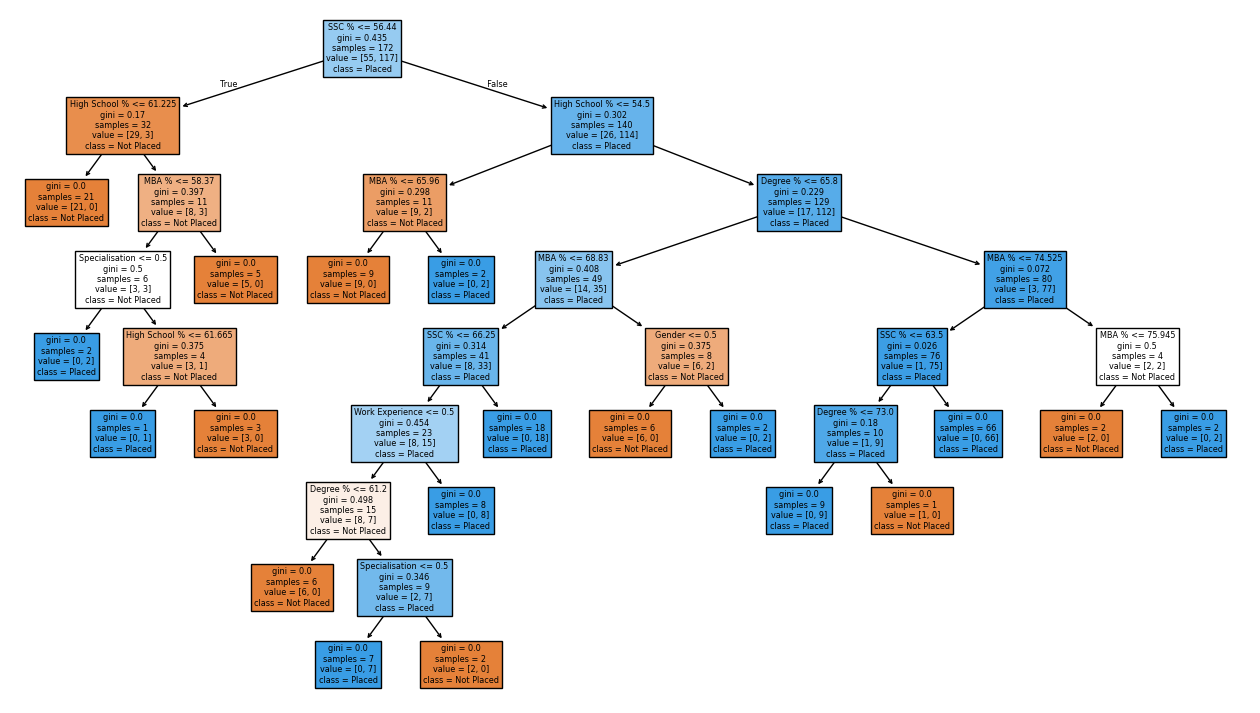

In [75]:
# 🌳 Train and visualize a Decision Tree Classifier for placement prediction

# Step 1: Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Step 2: Fit the model on the training data
# X_train contains the feature set, and y_train is the target label
dtc.fit(X_train, y_train)

# Step 3: Set the figure size for clear and readable visualization
plt.figure(figsize=(16, 9))

# Step 4: Visualize the trained decision tree
# - 'filled=True' adds color based on class purity
# - 'class_names' labels the target classes
# - 'feature_names' labels the input features used for splits
tree.plot_tree(
    dtc, 
    filled=True, 
    class_names=['Not Placed', 'Placed'], 
    feature_names=train.columns
)

In [76]:
# ✂️ Generate cost complexity pruning path for Decision Tree

# Step 1: Calculate the effective alphas and total impurity for each subtree during pruning
# - 'train' is the feature dataset
# - 'test' is the target labels (typically named 'y' or 'y_train/y_test')
cost_path = dtc.cost_complexity_pruning_path(train, test)

# Step 2: Extract the array of complexity parameter values (ccp_alpha)
# Each alpha represents a candidate pruning strength
ccp_alpha = cost_path.ccp_alphas

# Step 3: Extract the corresponding total impurity (loss) values for each alpha
impurities = cost_path.impurities

In [77]:
# 🔁 Train multiple Decision Tree models with different pruning levels (ccp_alpha)

# Initialize an empty list to store the trained models
model_list = []

# Loop through each alpha value obtained from cost complexity pruning
for alpha in ccp_alpha:
    # Create a Decision Tree with a specific pruning strength
    dc = DecisionTreeClassifier(ccp_alpha=alpha)
    
    # Train the model on the training data
    dc.fit(X_train, y_train)
    
    # Store the trained model in the list for later evaluation
    model_list.append(dc)

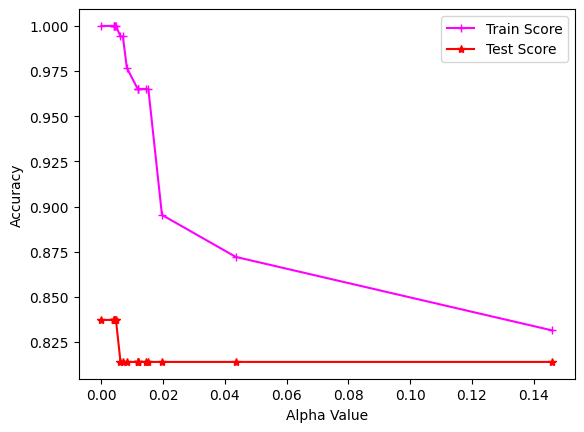

In [78]:
# 📈 Evaluate and visualize model accuracy across different pruning levels (ccp_alpha)

# Calculate training accuracy for each model in model_list
train_score = [clf.score(X_train, y_train) for clf in model_list]

# Calculate testing accuracy for each model to evaluate generalization performance
test_score = [clf.score(X_test, y_test) for clf in model_list]

# Set x-axis and y-axis labels for clarity
plt.xlabel('Alpha Value')       # Complexity parameter for pruning
plt.ylabel('Accuracy')          # Model accuracy score

# Plot training accuracy against alpha values
plt.plot(ccp_alpha, train_score, label='Train Score', marker='+', color='magenta')

# Plot testing accuracy against alpha values
plt.plot(ccp_alpha, test_score, label='Test Score', marker='*', color='red')

# Add a legend to distinguish between training and testing curves
plt.legend()

# Display the plot
plt.show()

[Text(0.3333333333333333, 0.9, 'SSC % <= 56.44\ngini = 0.435\nsamples = 172\nvalue = [55, 117]\nclass = Placed'),
 Text(0.16666666666666666, 0.7, 'gini = 0.17\nsamples = 32\nvalue = [29, 3]\nclass = Not Placed'),
 Text(0.25, 0.8, 'True  '),
 Text(0.5, 0.7, 'High School % <= 54.5\ngini = 0.302\nsamples = 140\nvalue = [26, 114]\nclass = Placed'),
 Text(0.41666666666666663, 0.8, '  False'),
 Text(0.3333333333333333, 0.5, 'gini = 0.298\nsamples = 11\nvalue = [9, 2]\nclass = Not Placed'),
 Text(0.6666666666666666, 0.5, 'Degree % <= 65.8\ngini = 0.229\nsamples = 129\nvalue = [17, 112]\nclass = Placed'),
 Text(0.5, 0.3, 'MBA % <= 68.83\ngini = 0.408\nsamples = 49\nvalue = [14, 35]\nclass = Placed'),
 Text(0.3333333333333333, 0.1, 'gini = 0.314\nsamples = 41\nvalue = [8, 33]\nclass = Placed'),
 Text(0.6666666666666666, 0.1, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]\nclass = Not Placed'),
 Text(0.8333333333333334, 0.3, 'gini = 0.072\nsamples = 80\nvalue = [3, 77]\nclass = Placed')]

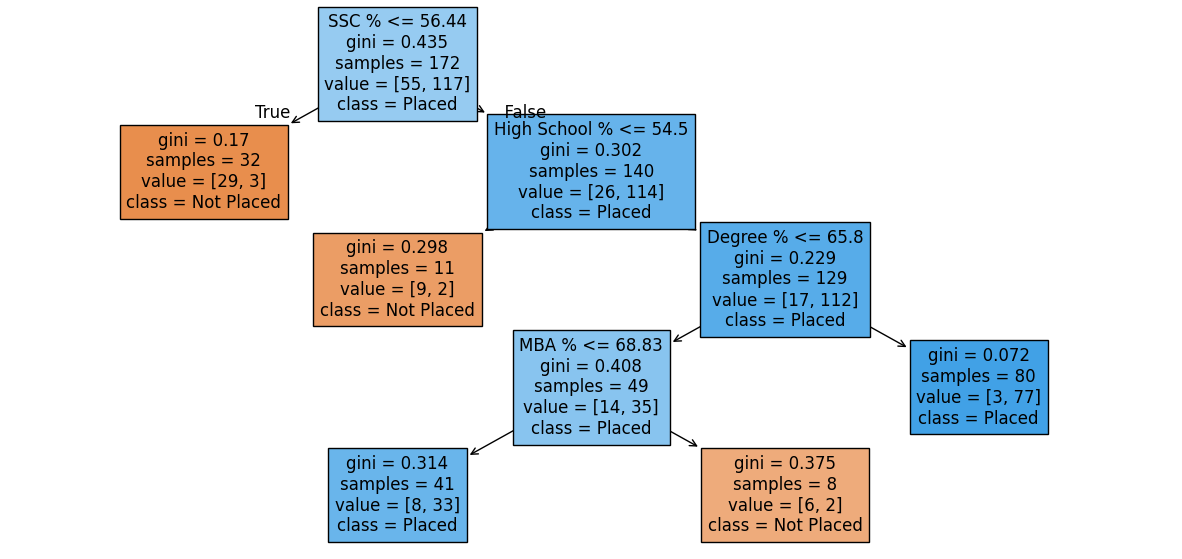

In [79]:
# ✅ Retrain Decision Tree using optimal ccp_alpha (pruning parameter)

# Step 1: Create a new Decision Tree Classifier with the chosen alpha value
# 0.0195 was selected based on evaluation of accuracy vs. complexity
dc = DecisionTreeClassifier(ccp_alpha=0.0195)

# Step 2: Fit the pruned model on the training dataset
dc.fit(X_train, y_train)

# Step 3: Set the plot size for clear visualization
plt.figure(figsize=(15, 7))

# Step 4: Plot the pruned Decision Tree
# - 'filled=True' colors nodes based on majority class
# - 'class_names' labels the predicted classes
# - 'feature_names' labels the features used for splits
tree.plot_tree(
    dc,
    filled=True,
    class_names=['Not Placed', 'Placed'],
    feature_names=train.columns
)

### Hyper-Parameter Tuning

In [80]:
params = {
    'RandomForest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(start=1,stop=1200,num=10)],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.0185,0.0190,0.0195,0.0200],
        }
    },
    
    'logistic':{
        'model':LogisticRegression(),
        'params':{
            'penalty':['l1', 'l2', 'elasticnet'],
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,1e-3,0.025,0.25,0.50],
            'solver':['lbfgs','liblinear','saga','newton-cg'],
            'multi_class':['auto', 'ovr', 'multinomial'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    },
    'D-tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'min_samples_split':[1,2,5,10,12],
            'min_samples_leaf':[1,2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.0185,0.0190,0.0195,0.0200],
        }
    },
    'SVM':{
        'model':SVC(),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,0.025,0.50,0.75],
            'kernel':['linear','poly','sigmoid','rbf'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    }
}

In [81]:
# 🔍 Perform hyperparameter tuning using RandomizedSearchCV for multiple models

# Initialize an empty list to collect results
scores = []

# Loop through each model and its corresponding parameter grid in the 'params' dictionary
for model_name, mp in params.items():
    
    # Step 1: Initialize RandomizedSearchCV
    # - mp['model']: the ML model to be tuned
    # - mp['params']: dictionary of hyperparameter search space
    # - cv=5: 5-fold cross-validation
    # - n_iter=10: sample 10 random combinations of hyperparameters
    # - n_jobs=-1: use all available CPU cores for parallel processing
    # - scoring='accuracy': optimize for accuracy
    clf = RandomizedSearchCV(
        mp['model'],
        param_distributions=mp['params'],
        cv=5,
        n_iter=10,
        n_jobs=-1,
        scoring='accuracy'
    )
    
    # Step 2: Fit the model using training data
    clf.fit(X_train, y_train)
    
    # Step 3: Store the best results in a structured format
    scores.append({
        'Model Name': model_name,
        'Best Score': clf.best_score_,                 # Cross-validated best accuracy
        'Best Estimator': clf.best_estimator_          # Model with optimal hyperparameters
    })

In [82]:
# 📋 Convert hyperparameter tuning results into a structured DataFrame

# Create a DataFrame from the 'scores' list of dictionaries
# Each dictionary contains model name, best cross-validation score, and best estimator
scores_df = pd.DataFrame(
    data=scores,
    columns=['Model Name', 'Best Score', 'Best Estimator']
)

# Display the first few rows of the results for review
scores_df.head()

,Model Name,Best Score,Best Estimator
0,RandomForest,0.872605,"(DecisionTreeClassifier(ccp_alpha=0.019, max_d..."
1,logistic,0.884034,"LogisticRegression(C=0.75, max_iter=111, multi..."
2,D-tree,0.814286,"DecisionTreeClassifier(ccp_alpha=0.02, max_fea..."
3,SVM,0.860672,"SVC(max_iter=111, tol=0.5)"


In [83]:
# 🌲 Train a Random Forest Classifier with optimized hyperparameters

# Step 1: Initialize the Random Forest Classifier with tuned parameters
rf = RandomForestClassifier(
    ccp_alpha=0.02,             # Cost complexity pruning parameter
    max_depth=30,               # Maximum depth of each tree
    max_features='sqrt',        # Number of features considered at each split
    min_samples_leaf=2,         # Minimum samples required at a leaf node
    min_samples_split=12,       # Minimum samples required to split an internal node
    n_estimators=267            # Number of trees in the forest
)

# Step 2: Fit the model on training data
rf.fit(X_train, y_train)

# Step 3: Predict the labels on the test dataset
y_pred = rf.predict(X_test)

# Step 4: Evaluate and print the accuracy of the model
print(accuracy_score(y_test, y_pred))

0.7441860465116279


In [84]:
# ➕ Train a Logistic Regression model with tuned hyperparameters

# Step 1: Initialize Logistic Regression with custom/tuned settings
lr = LogisticRegression(
    C=0.25,                    # Inverse of regularization strength (lower = more regularization)
    max_iter=111,              # Maximum number of iterations for the solver to converge
    multi_class='ovr',         # One-vs-Rest strategy for multi-class problems
    solver='newton-cg',        # Optimization algorithm (good for smaller datasets and accuracy)
    tol=1e-05                  # Tolerance for stopping criteria (smaller = stricter convergence)
)

# Step 2: Train the model on the training set
lr.fit(X_train, y_train)

# Step 3: Predict labels for the test set
y_pred = lr.predict(X_test)

# Step 4: Evaluate and print model accuracy on the test data
print(accuracy_score(y_test, y_pred))


0.8372093023255814


In [85]:
# 🌳 Train a Decision Tree Classifier with optimized hyperparameters

# Step 1: Initialize the Decision Tree model with specified parameters
dc = DecisionTreeClassifier(
    ccp_alpha=0.019,            # Cost-complexity pruning to reduce overfitting
    criterion='entropy',        # Use information gain (entropy) for split quality
    max_features='sqrt',        # Consider square root of total features at each split
    min_samples_leaf=5,         # Minimum number of samples required at a leaf node
    min_samples_split=5,        # Minimum number of samples required to split an internal node
    splitter='random'           # Randomly choose the best split (adds regularization)
)

# Step 2: Fit the model on the training data
dc.fit(X_train, y_train)

# Step 3: Predict on the test data
y_pred = dc.predict(X_test)

# Step 4: Evaluate and print accuracy of the model
print(accuracy_score(y_test, y_pred))

0.7209302325581395


In [86]:
# 📋 Print a detailed classification report for the Random Forest model

# Generate and display precision, recall, f1-score, and support for each class
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.57      0.33      0.42        12
           1       0.78      0.90      0.84        31

    accuracy                           0.74        43
   macro avg       0.67      0.62      0.63        43
weighted avg       0.72      0.74      0.72        43



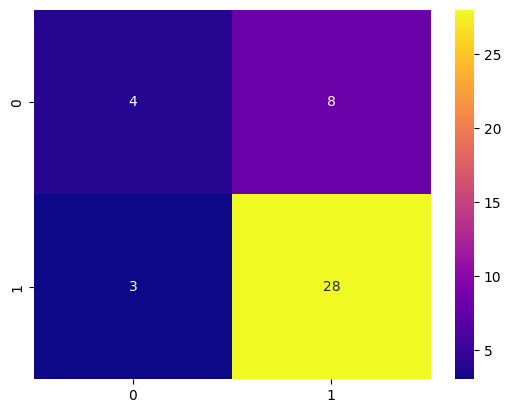

In [87]:
# 🔲 Generate and visualize the confusion matrix for the Random Forest model

# Step 1: Compute the confusion matrix comparing actual vs. predicted labels
cn = confusion_matrix(y_test, rf.predict(X_test))

# Step 2: Create a heatmap visualization of the confusion matrix
# - 'annot=True' displays the numeric values inside the boxes
# - 'cmap' sets the color theme; 'plasma' provides a vibrant color scale
sns.heatmap(cn, annot=True, cmap='plasma')

# Step 3: Show the heatmap plot
plt.show()

### Model Testing

In [88]:
# 🔁 Generate predictions for every instance in the training dataset using Random Forest

# Convert the training DataFrame into a NumPy array for row-wise iteration
train_data = np.array(train)

# Initialize an empty list to store predictions
predicted = []

# Loop over each row in the training data
for i in range(len(train_data)):
    # Use the Random Forest model to predict the class for each individual sample
    predicted.append(rf.predict([train_data[i]]))

# Display the list of predictions
predicted

[array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),

In [89]:
# 📊 Create a result DataFrame to compare actual vs predicted placement outcomes

# Step 1: Create a copy of the training DataFrame for safe modification
result_df = train.copy()

# Step 2: Add the actual placement status as a new column
# 'test' contains the true labels (y values), aligned with the training data
result_df['Actual'] = np.array(test)

# Step 3: Add the predicted placement status as a new column
# 'predicted' contains the predicted values for each sample
result_df['Predicted'] = np.array(predicted)

# Step 4: Display the first few rows of the result DataFrame for inspection
result_df.head()

,Gender,Specialisation,Technical Degree,Work Experience,SSC %,High School %,Degree %,MBA %,Actual,Predicted
0,1,1,2,0,67.00,91.00,58.00,58.80,1,1
1,1,0,2,1,79.33,78.33,77.48,66.28,1,1
2,1,0,0,0,65.00,68.00,64.00,57.80,1,1
3,1,1,2,0,56.00,52.00,52.00,59.43,0,0
4,1,0,0,0,85.80,73.60,73.30,55.50,1,1


In [90]:
result_df['Actual'].value_counts()

Actual
1    148
0     67
Name: count, dtype: int64

In [91]:
result_df['Predicted'].value_counts()

Predicted
1    164
0     51
Name: count, dtype: int64

In [92]:
get_mappings

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

### Predicted Probability

In [93]:
# 🔁 Predict class probabilities for each individual sample in the training dataset using Random Forest

# Convert the training DataFrame into a NumPy array for row-wise iteration
train_data = np.array(train)

# Initialize an empty list to store prediction probabilities
predicted = []

# Loop through each row/sample in the training data
for i in range(len(train_data)):
    # Predict the probability distribution over classes for each sample
    # rf.predict_proba returns an array like [ [P(Not Placed), P(Placed)] ]
    predicted.append(rf.predict_proba([train_data[i]]))

# Output the list of predicted probabilities
predicted

[array([[0.31707759, 0.68292241]]),
 array([[0.06978864, 0.93021136]]),
 array([[0.1661813, 0.8338187]]),
 array([[0.89472769, 0.10527231]]),
 array([[0.06653229, 0.93346771]]),
 array([[0.70225247, 0.29774753]]),
 array([[0.78456067, 0.21543933]]),
 array([[0.07414904, 0.92585096]]),
 array([[0.06925566, 0.93074434]]),
 array([[0.48833061, 0.51166939]]),
 array([[0.46022672, 0.53977328]]),
 array([[0.07079714, 0.92920286]]),
 array([[0.85802774, 0.14197226]]),
 array([[0.24780257, 0.75219743]]),
 array([[0.796133, 0.203867]]),
 array([[0.08069298, 0.91930702]]),
 array([[0.15192994, 0.84807006]]),
 array([[0.60426012, 0.39573988]]),
 array([[0.38093046, 0.61906954]]),
 array([[0.18992893, 0.81007107]]),
 array([[0.1697724, 0.8302276]]),
 array([[0.07999486, 0.92000514]]),
 array([[0.10171324, 0.89828676]]),
 array([[0.12767069, 0.87232931]]),
 array([[0.11565457, 0.88434543]]),
 array([[0.74189677, 0.25810323]]),
 array([[0.06424522, 0.93575478]]),
 array([[0.13612489, 0.86387511]]),


In [94]:
predicted[0][0],predicted[0][0][0],predicted[0][0][1]

(array([0.31707759, 0.68292241]),
 np.float64(0.31707758773164973),
 np.float64(0.6829224122683507))

In [95]:
# 📈 Add predicted class probabilities to the result DataFrame

# Step 1: Add probability of NOT getting placed (class 0) for each row
# Extract the first value from each probability pair in the 'predicted' list
result_df['Prob_Not_Getting_Placed'] = np.array([predicted[i][0][0] for i in range(len(predicted))])

# Step 2: Add probability of getting placed (class 1) for each row
# Extract the second value from each probability pair in the 'predicted' list
result_df['Prob_Getting_Placed'] = np.array([predicted[i][0][1] for i in range(len(predicted))])

# Step 3: Display the updated DataFrame with probability columns
result_df

,Gender,Specialisation,Technical Degree,Work Experience,SSC %,High School %,Degree %,MBA %,Actual,Predicted,Prob_Not_Getting_Placed,Prob_Getting_Placed
0,1,1,2,0,67.00,91.00,58.00,58.80,1,1,0.317078,0.682922
1,1,0,2,1,79.33,78.33,77.48,66.28,1,1,0.069789,0.930211
2,1,0,0,0,65.00,68.00,64.00,57.80,1,1,0.166181,0.833819
3,1,1,2,0,56.00,52.00,52.00,59.43,0,0,0.894728,0.105272
4,1,0,0,0,85.80,73.60,73.30,55.50,1,1,0.066532,0.933468
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,0,0,0,80.60,82.00,77.60,74.49,1,1,0.118760,0.881240
211,1,0,2,0,58.00,60.00,72.00,53.62,1,1,0.298517,0.701483
212,1,0,0,1,67.00,67.00,73.00,69.72,1,1,0.085692,0.914308
213,0,1,0,0,74.00,66.00,58.00,60.23,1,1,0.332542,0.667458


In [96]:
# 💾 Save the trained Random Forest model to a file using pickle

import pickle  # Python’s built-in object serialization library

# Step 1: Open a binary writeable file named 'CPP.pkl'
file = open('CPP.pkl', 'wb')

# Step 2: Serialize (dump) the trained Random Forest model into the file
pickle.dump(rf, file)

# Step 3: Close the file to ensure it's properly written and saved
file.close()